In [29]:
#from MelaNet import MelaData

import os
import random
import numpy as np
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

# 0 - Pre-processing on images

# 1 - Load the data

In [25]:
base_dir = 'data/'

In [37]:
train = MelaData(data_dir=base_dir+'images/train/', label_csv=base_dir+'HAM10000_metadata.csv')
test = MelaData(data_dir=base_dir+'images/test/', label_csv=base_dir+'HAM10000_metadata.csv')

In [40]:
bs = 64
train_loader = torch.utils.data.DataLoader(train, batch_size=bs, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=bs, shuffle=False)

## 2 - Category distribution

In [17]:
df = pd.read_csv('data/HAM10000_metadata.csv', sep = ',')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


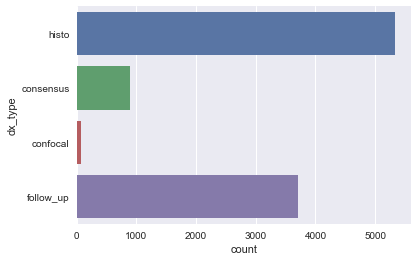

In [33]:
sns.set(style="darkgrid")
sns.countplot(y ='dx_type', data = df)
plt.show()

## 2 - Basic Neural Network

A basic NN to predict melanomes from raw data

In [41]:
class classifier(nn.Module):
    
    def __init__(self):
        super(classifier, self).__init__()
        # fill the missing entries below
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)
        self.fc = nn.Linear(in_features=128, out_features=2)
        
    def forward(self,x):
        # implement your network here, use F.max_pool2d, F.log_softmax and do not forget to flatten your vector
        x = self.conv1(x)
        x = F.max_pool2d(x,7)
        x = x.view(x.size(0),-1)
        x = self.fc(x)
        x = F.log_softmax(x)
        return x

In [13]:
conv_class = classifier()

In [14]:
use_gpu = torch.cuda.is_available()
if use_gpu:
    conv_class = conv_class.cuda()